<a href="https://colab.research.google.com/github/Rajeshprd/Simple-Linear-Regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**Import the dataset**

In [2]:
wc_at = pd.read_csv("/content/wc.at.csv")

#**Description of dataset**

In [32]:
wc_at.shape

(109, 2)

In [33]:
wc_at.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [34]:
wc_at.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [35]:
wc_at.nunique()

Waist    88
AT       99
dtype: int64

##**Exploratory data analysis**

### Finding the null values

In [3]:
wc_at.isnull().sum()   # No null values

Waist    0
AT       0
dtype: int64

### Finding the outliers

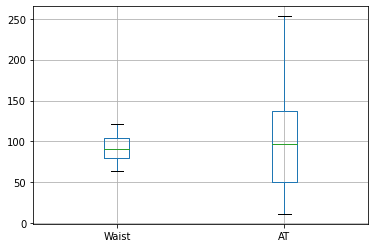

In [4]:
wc_at.boxplot()   # No outliers

### feature engineering not required because no null values and no outliers

#**Splitting the data**

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(wc_at,test_size = 0.20)

#### must do for simple linear regression- transpose the data

In [8]:
import numpy as np
X = np.array(wc_at.Waist).reshape(-1,1)
y = np.array(wc_at.AT).reshape(-1,1)

In [9]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

##**Importing the LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

#to create the model

In [11]:
model = LinearRegression() #y = mx + C

#to train model/ fitting the model

In [12]:
model.fit(X = x_train,  y= y_train)

LinearRegression()

#to coeffecient of x

In [13]:
model.coef_

array([[3.44694332]])

#to intercept or constant

In [14]:
model.intercept_

array([-213.34071739])

#equation of line = y = 3.5x - 221

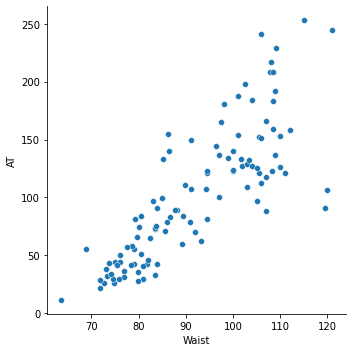

In [15]:
sns.relplot(x = "Waist",
            y = "AT",
            data = wc_at,
            kind = "scatter")

In [16]:
y_pred = model.predict(x_test)

In [18]:
y_pred_train =model.predict(x_train)

In [19]:
pred_value = model.predict(np.array(wc_at.Waist).reshape(-1,1))

# to find the accuracy of the model

In [20]:
model.score(X = x_test, y = y_test)

0.7358029576877247

# **Model deployment**

In [21]:
X_new = np.array([50,55,70,80]).reshape(-1,1)

In [22]:
y_new = model.predict(X_new)
y_new

array([[-40.99355132],
       [-23.75883471],
       [ 27.94531511],
       [ 62.41474833]])

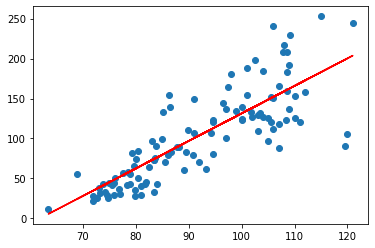

In [27]:
plt.scatter(wc_at.Waist,wc_at.AT)
plt.plot(wc_at.Waist,pred_value,"r")

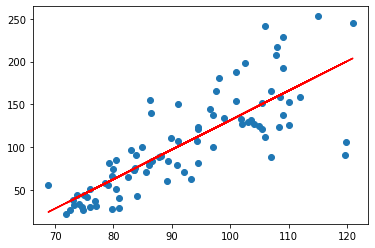

In [28]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train,"r")

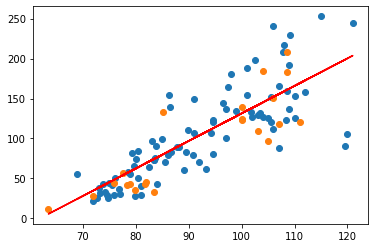

In [31]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(wc_at.Waist,pred_value,"r")
plt.show()